In [1]:
# 라이브러리 호출

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# Add multiclass aveage type and multi_class type
# average: multiclass ROC AUC currently only handles 
#          the 'macro' :  not take label imbalance into account and 'weighted' averages
# mult_class : 'ovr' sensitive to class imbalance, 'ovo' Insensitive to class imbalance
def get_clf_eval(y_test, pred=None, pred_proba=None,average=None,multi_class=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    
    precision = None
    recall = None
    f1 = None      
    roc_auc = None

    if average != None:
      precision = precision_score(y_test , pred,average=average)
      recall = recall_score(y_test , pred,average=average)
      f1 = f1_score(y_test, pred, average=average) 
      # ROC-AUC 추가 
      roc_auc = roc_auc_score(y_test, pred_proba,average=average,multi_class=multi_class)   
    else:
      precision = precision_score(y_test)
      recall = recall_score(y_test , pred)
      f1 = f1_score(y_test,pred)
      roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0}, 정밀도: {1}, 재현율: {2},\
    F1 : {3}, AUC:{4}'.format(accuracy, precision, recall, f1, roc_auc))
    

In [3]:
# Dataset 호출
import pandas as pd

iris = load_iris()

In [4]:
iris_data = iris.data
print(type(iris_data))
iris_label = iris.target

print("iris target: ", iris_label)
print("iris_target name", iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df.head(3)

<class 'numpy.ndarray'>
iris target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris_target name ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=4)

In [6]:
#알고리즘 생성 및 학습
#KNeighborsClassifier 생성 및 학습
kn_clf = KNeighborsClassifier(n_neighbors=3)

kn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
y_pred = kn_clf.predict(X_test)

In [8]:
y_pred_prob = kn_clf.predict_proba(X_test)

In [9]:
from sklearn import metrics

score = metrics.accuracy_score(y_test, y_pred)

print(score)

0.9666666666666667


In [42]:
get_clf_eval(y_test, y_pred,y_pred_prob, average="macro",multi_class="ovr")

오차 행렬
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
정확도: 0.9666666666666667, 정밀도: 0.9666666666666667, 재현율: 0.9333333333333332,    F1 : 0.94541910331384, AUC:0.9565149911816578


In [43]:
k_range = range(1,26)
score = {}
score_list = []

for k in k_range:
  kn_clf = KNeighborsClassifier(n_neighbors=k)
  kn_clf.fit(X_train, y_train)
  y_pred = kn_clf.predict(X_test)
  score[k] = metrics.accuracy_score(y_test, y_pred)
  score_list.append( metrics.accuracy_score(y_test, y_pred))

print(score)

{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 0.9666666666666667, 10: 0.9666666666666667, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 0.9666666666666667, 14: 0.9666666666666667, 15: 0.9666666666666667, 16: 0.9666666666666667, 17: 0.9666666666666667, 18: 0.9666666666666667, 19: 0.9666666666666667, 20: 0.9333333333333333, 21: 0.9666666666666667, 22: 0.9333333333333333, 23: 0.9666666666666667, 24: 0.9666666666666667, 25: 0.9666666666666667}


Text(0, 0.5, 'Test Accuracy')

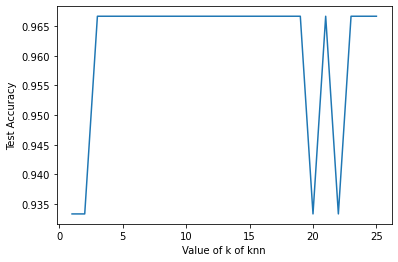

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range,score_list)
plt.xlabel('Value of k of knn')
plt.ylabel('Test Accuracy')

In [ ]:
#final model

kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_pred = kn_clf.predict(x_new)

print(iris.target_names[y_pred[0]])
print(iris.target_names[y_pred[1]])

versicolor
setosa
